In [1]:
# Import pacakages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data
# data_1960_2000 = pd.read_csv('./Datasets/Population Estimation and Projection 1960-2000.csv',low_memory=False)
# data_2001_2050 = pd.read_csv('./Datasets/Population Estimation and Projection 2001-2050.csv',low_memory=False)
data_1960_2050 = pd.read_csv('./Datasets/Minimized Data 1960-2050.csv', low_memory=False)

In [3]:
# data_1960_2000.head()

In [4]:
# data_2001_2050.head()

In [5]:
# Removing Duplicated Fields
# data_2001_2050.pop('Country Name')
# data_2001_2050.pop('Country Code')
# data_2001_2050.pop('Series Name')
# data_2001_2050.pop('Series Code')
# 
# pop_data = pd.concat([data_1960_2000, data_2001_2050], axis=1, join="outer") 
# This is a bad assumption. We must fix this or pivot. 
# The line above assumes the data sets are the same length and lined up which is not true.

pop_data = data_1960_2050

i=1960
string =["Country_Name", "Country_Code", "Series_Name", "Series_Code"]
while i != 2051:
    temp = "[" + str(i) + "]"
    string.append(temp)
    i = i + 1
    
pop_data.columns = string

pop_data = pop_data.replace('..', np.nan)

In [6]:
pop_data.head()

,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],...,[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
0,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,81.617265593364,82.6886781269233,83.2893702677964,83.6040745667416,83.8538402296331,84.1305132205961,...,52.721641363705,51.9732864237122,51.2542813990082,50.5649528551787,49.905272496857,49.3091701493759,48.7358507892608,48.1851513162138,47.6569146420521,47.1525182056463
1,Afghanistan,AFG,"Age dependency ratio, old",SP.POP.DPND.OL,5.08221355458813,5.13013875077877,5.1396410434319,5.11552596472367,5.06374943823744,4.98789855835,...,6.22910451801117,6.38374301415072,6.54627153153927,6.71856043377268,6.90243289671151,7.10386591421077,7.31255821375793,7.5283209975396,7.74944602991995,7.97648707408324
2,Afghanistan,AFG,"Age dependency ratio, young",SP.POP.DPND.YG,76.5350520387758,77.5585393761445,78.1497292243645,78.4885486020179,78.7900907913956,79.1426146622461,...,46.4925368456938,45.5895434095615,44.7080098674689,43.846392421406,43.0028396001455,42.2053042351651,41.4232925755029,40.6568303186742,39.9074686121321,39.1760311315631
3,Afghanistan,AFG,Net migration,SM.POP.NETM,NaN,NaN,-20000,NaN,NaN,NaN,...,NaN,-311082,NaN,NaN,NaN,NaN,-310076,NaN,NaN,NaN
4,Afghanistan,AFG,Number of deaths ages 10-14 years,SH.DTH.1014,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
non_nation_str = ["Arab World", "High income", "IBRD only", "IDA & IBRD total", "IDA blend", "IDA only", "IDA total", "Late-demographic dividend", "Post-demographic dividend", "Sub-Saharan Africa", "Upper middle income","World", "Africa Eastern and Southern", "Africa Western and Central", "Central Europe and the Baltics", "Early-demographic dividend", "East Asia & Pacific", "East Asia & Pacific (excluding high income)", "East Asia & Pacific (IDA & IBRD countries)", "Euro area", "Europe & Central Asia", "Europe & Central Asia (excluding high income)", "Europe & Central Asia (IDA & IBRD countries)", "European Union", "Fragile and conflict affected situations", "Heavily indebted poor countries (HIPC)", "Latin America & Caribbean", "Latin America & Caribbean (excluding high income)", "Latin America & the Caribbean (IDA & IBRD countries)", "Least developed countries: UN classification", "Low & middle income", "Low income", "Lower middle income", "Middle East & North Africa", "Middle East & North Africa (excluding high income)", "Middle East & North Africa (IDA & IBRD countries)", "Middle income", "Not classified", "OECD members", "Other small states", "Pre-demographic dividend", "Small states", "South Asia", "South Asia (IDA & IBRD)", "Sub-Saharan Africa (excluding high income)", "Sub-Saharan Africa (IDA & IBRD countries)"]
nation_data = pop_data[~pop_data.Country_Name.isin(non_nation_str)]
non_nation_data = pop_data[pop_data.Country_Name.isin(non_nation_str)]

In [8]:
nation_data.head()

,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],...,[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
0,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,81.617265593364,82.6886781269233,83.2893702677964,83.6040745667416,83.8538402296331,84.1305132205961,...,52.721641363705,51.9732864237122,51.2542813990082,50.5649528551787,49.905272496857,49.3091701493759,48.7358507892608,48.1851513162138,47.6569146420521,47.1525182056463
1,Afghanistan,AFG,"Age dependency ratio, old",SP.POP.DPND.OL,5.08221355458813,5.13013875077877,5.1396410434319,5.11552596472367,5.06374943823744,4.98789855835,...,6.22910451801117,6.38374301415072,6.54627153153927,6.71856043377268,6.90243289671151,7.10386591421077,7.31255821375793,7.5283209975396,7.74944602991995,7.97648707408324
2,Afghanistan,AFG,"Age dependency ratio, young",SP.POP.DPND.YG,76.5350520387758,77.5585393761445,78.1497292243645,78.4885486020179,78.7900907913956,79.1426146622461,...,46.4925368456938,45.5895434095615,44.7080098674689,43.846392421406,43.0028396001455,42.2053042351651,41.4232925755029,40.6568303186742,39.9074686121321,39.1760311315631
3,Afghanistan,AFG,Net migration,SM.POP.NETM,NaN,NaN,-20000,NaN,NaN,NaN,...,NaN,-311082,NaN,NaN,NaN,NaN,-310076,NaN,NaN,NaN
4,Afghanistan,AFG,Number of deaths ages 10-14 years,SH.DTH.1014,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
non_nation_data.head()

,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],...,[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
630,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,88.06112205164,89.4895108163163,90.7824558771063,91.8989500408246,92.7280061443775,93.2012930138842,...,54.2441783119108,54.3563323234361,54.5022218543154,54.6771558210053,54.8749650103232,55.1035089860824,55.3336141517315,55.5643422212161,55.7915346893762,56.0120656305736
631,Arab World,ARB,"Age dependency ratio, old",SP.POP.DPND.OL,6.59195408307987,6.70090074366887,6.79327971905438,6.86732593028292,6.91922151681126,6.94779074720844,...,12.9750648954027,13.3475510934054,13.734951831815,14.1351286360119,14.5470057281549,14.9489352712508,15.3520425351572,15.7588941463234,16.1719816705628,16.5930502916949
632,Arab World,ARB,"Age dependency ratio, young",SP.POP.DPND.YG,81.3241959797136,82.6261975934145,83.7891599151482,84.767355707796,85.4742092499346,85.8729747117985,...,40.7548981158081,40.5397423161751,40.3430558582432,40.1606457111372,39.9856622458736,39.8438737794253,39.698024070688,39.5451965425481,39.3796136994057,39.1964464633705
633,Arab World,ARB,Net migration,SM.POP.NETM,NaN,NaN,-499808,NaN,NaN,NaN,...,NaN,-868781,NaN,NaN,NaN,NaN,-868273,NaN,NaN,NaN
634,Arab World,ARB,Number of deaths ages 10-14 years,SH.DTH.1014,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
pop_totals = nation_data[nation_data.Series_Code == "SP.POP.TOTL"] #Population Totals
pop_growth = nation_data[nation_data.Series_Code == "SP.POP.GROW"] #Population Growth
pop_migration = nation_data[nation_data.Series_Code == "SM.POP.NETM"] #Net Migration

world_total = non_nation_data[non_nation_data.Series_Code == "SP.POP.TOTL"]
world_total = world_total[world_total.Country_Code == "WLD"]

world_growth = non_nation_data[non_nation_data.Series_Code == "SP.POP.GROW"]
world_growth = world_growth[world_growth.Country_Code == "WLD"]

male_totals = nation_data[nation_data.Series_Code == "SP.POP.TOTL.MA.IN"] #Male Population
female_totals = nation_data[nation_data.Series_Code == "SP.POP.TOTL.FE.IN"] #Female Population
rural_totals = nation_data[nation_data.Series_Code == "SP.RUR.TOTL"] #Rural Population Total
urban_totals = nation_data[nation_data.Series_Code == "SP.URB.TOTL"] #Urban Population Total

In [11]:
pop_totals.head()

,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],...,[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
62,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967,9169406,9351442,9543200,9744772,9956318,...,57748000,58574000,59387000,60188000,60974000,61746000,62503000,63245000,63972000,64683000
152,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2571000,2550000,2529000,2508000,2486000,2465000,2443000,2421000,2399000,2377000
242,Algeria,DZA,"Population, total",SP.POP.TOTL,11057864,11336336,11619828,11912800,12221675,12550880,...,56174000,56711000,57250000,57789000,58326000,58859000,59388000,59911000,60423000,60923000
332,American Samoa,ASM,"Population, total",SP.POP.TOTL,20127,20605,21246,22029,22850,23675,...,54000,54000,54000,54000,54000,54000,54000,54000,54000,54000
422,Andorra,AND,"Population, total",SP.POP.TOTL,13410,14378,15379,16407,17466,18542,...,78000,78000,78000,77000,77000,77000,77000,77000,76000,76000


In [12]:
world_total.head()

,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],...,[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
20582,World,WLD,"Population, total",SP.POP.TOTL,3032156070,3071596055,3124561005,3189655687,3255145692,3322046795,...,9201714000,9259081000,9315314000,9370366000,9424214000,9476828000,9528225000,9578391000,9627322000,9674665000


In [13]:
world_growth.head()

,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],...,[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
20577,World,WLD,Population growth (annual %),SP.POP.GROW,NaN,1.30072410817561,1.7243462047616,2.08332248580949,2.05319982551457,2.05524143402917,...,0.639752734813342,0.62343819857908,0.60732809228044,0.59098383586425,0.57466271861739,0.558285285117677,0.542343915073687,0.526498901946582,0.510847803143562,0.491756689970487


In [14]:
print(pop_totals.Country_Name.tolist()) # Someone should double check I have not included an accidental non-country

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia, The

In [15]:
print(pop_data.dtypes)

Country_Name    object
Country_Code    object
Series_Name     object
Series_Code     object
[1960]          object
                 ...  
[2046]          object
[2047]          object
[2048]          object
[2049]          object
[2050]          object
Length: 95, dtype: object


In [16]:
def preparePlot(dataframe): #We can use this method to plot individual plots (Can be expanded to be more automated)
    string = dataframe['Country_Name'].tolist()
    dataframe = dataframe.T
    dataframe = dataframe.iloc[4:]
    dataframe = dataframe.astype('float64')
    dataframe.columns = string
    return dataframe

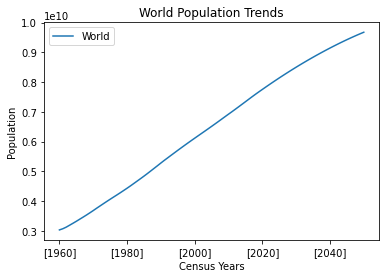

In [17]:
world_total_plot = preparePlot(world_total)
world_total_plot.plot(title = "World Population Trends")
plt.ylabel("Population")
plt.xlabel("Census Years")
plt.legend(["World"])

In [18]:
world_growth.head()

,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],...,[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
20577,World,WLD,Population growth (annual %),SP.POP.GROW,NaN,1.30072410817561,1.7243462047616,2.08332248580949,2.05319982551457,2.05524143402917,...,0.639752734813342,0.62343819857908,0.60732809228044,0.59098383586425,0.57466271861739,0.558285285117677,0.542343915073687,0.526498901946582,0.510847803143562,0.491756689970487


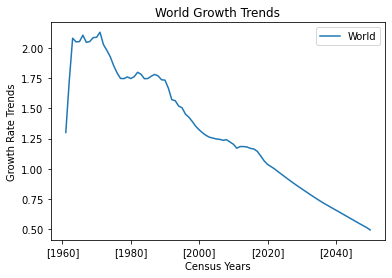

In [19]:
world_growth_plot = preparePlot(world_growth)
world_growth_plot.plot(title = "World Growth Trends")
plt.ylabel("Growth Rate Trends")
plt.xlabel("Census Years")
plt.legend(["World"])

In [20]:
pop_migration.head(50)

,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],...,[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
3,Afghanistan,AFG,Net migration,SM.POP.NETM,NaN,NaN,-20000,NaN,NaN,NaN,...,NaN,-311082,NaN,NaN,NaN,NaN,-310076,NaN,NaN,NaN
93,Albania,ALB,Net migration,SM.POP.NETM,NaN,NaN,-99,NaN,NaN,NaN,...,NaN,-40000,NaN,NaN,NaN,NaN,-40000,NaN,NaN,NaN
183,Algeria,DZA,Net migration,SM.POP.NETM,NaN,NaN,-282941,NaN,NaN,NaN,...,NaN,-50002,NaN,NaN,NaN,NaN,-50002,NaN,NaN,NaN
273,American Samoa,ASM,Net migration,SM.POP.NETM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,Andorra,AND,Net migration,SM.POP.NETM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453,Angola,AGO,Net migration,SM.POP.NETM,NaN,NaN,-296717,NaN,NaN,NaN,...,NaN,-4998,NaN,NaN,NaN,NaN,-5000,NaN,NaN,NaN
543,Antigua and Barbuda,ATG,Net migration,SM.POP.NETM,NaN,NaN,-1880,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
723,Argentina,ARG,Net migration,SM.POP.NETM,NaN,NaN,122000,NaN,NaN,NaN,...,NaN,6000,NaN,NaN,NaN,NaN,6000,NaN,NaN,NaN
813,Armenia,ARM,Net migration,SM.POP.NETM,NaN,NaN,70335,NaN,NaN,NaN,...,NaN,-24989,NaN,NaN,NaN,NaN,-24989,NaN,NaN,NaN
903,Aruba,ABW,Net migration,SM.POP.NETM,NaN,NaN,-4323,NaN,NaN,NaN,...,NaN,334,NaN,NaN,NaN,NaN,269,NaN,NaN,NaN


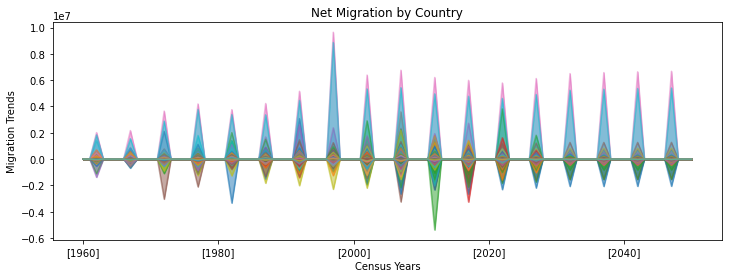

In [21]:
migration_plot = preparePlot(pop_migration)
fig, axs = plt.subplots(figsize=(12, 4))  
migration_plot.plot.area(ax = axs, stacked = False)
axs.get_legend().remove()
axs.set_xlabel("Census Years")
axs.set_ylabel("Migration Trends")
axs.set_title("Net Migration by Country")
fig.savefig("Migration Trends")